<a href="https://colab.research.google.com/github/Krupa049/ANN/blob/main/ANN_BCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-f3483928803c>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


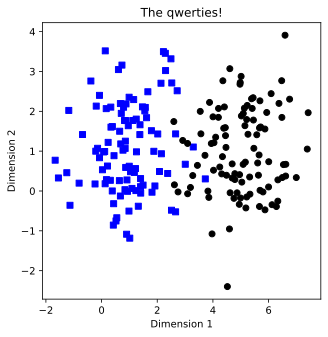

In [27]:
nPerClust = 100
blur = 1

A = [ 1, 1 ]
B = [ 5, 1 ]

# Generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# True labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# Concatanate into a matrix
data_np = np.hstack((a,b)).T

# Convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# Show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [35]:
# Inspect types
print(type(data_np))
print(np.shape(data_np))
print(' ')

print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(200, 2)
 
<class 'torch.Tensor'>
torch.Size([200, 2])


In [36]:
# Building the model
ANNclassify = nn.Sequential(
    nn.Linear(2,1),     # Input Layer
    nn.ReLU(),          # Activation Unit
    nn.Linear(1,1),     # Output Unit
    nn.Sigmoid(),       # Final Activation Unit
  )

ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [54]:
learningRate = .01

# Loss function
lossfun = nn.BCELoss()

# Optimizer
optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningRate)

In [55]:
# Training the model
numepochs = 1000
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

  # Forward pass
  yHat = ANNclassify(data)

  # Computing the loss
  loss = lossfun(yHat,labels)
  losses[epochi] = loss

  # Backpropogation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

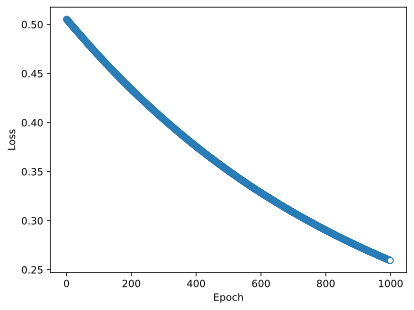

In [56]:
# Showing the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [57]:
# Computing the predictions

# Manually computing the losses
# Final forward pass
predictions = ANNclassify(data)

predlabels = predictions>.5

# Finding errors
misclassified = np.where(predlabels != labels)[0]

# Total Accuracy
totalacc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %totalacc)

Final accuracy: 96.5%


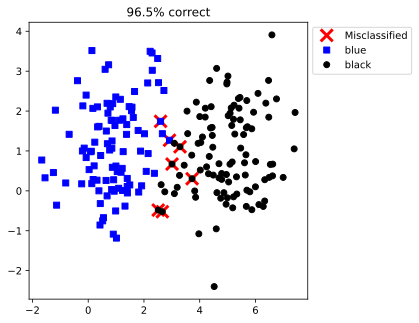

In [58]:
# Plotting the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0], data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()